<a href="https://colab.research.google.com/github/bagavijit418/-Facial-Keypoints-Detection/blob/master/Facial_Key_Points_Detection_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the project

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are misssing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

For more details go this [Kaggle Project Link](https://www.kaggle.com/karanjakhar/facial-keypoint-detection)

**Data Files**

*   **Training.csv:** list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.
*   **Test.csv**: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels



#Acquiring Dataset

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           2281  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1592  
thegurus/spanish-high-speed-rail-system-ticket-pricing  Spanish High Speed Rail tickets pricing - Renfe    27MB  2019-05-10 06:50:30            437  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21           1099  
taniaj/australian-election-2019-tweets                  Australian

In [2]:
!kaggle competitions download -c facial-keypoints-detection

 68% 41.0M/60.1M [00:00<00:00, 22.8MB/s]
100% 60.1M/60.1M [00:01<00:00, 56.4MB/s]
 56% 9.00M/16.0M [00:00<00:00, 12.3MB/s]
100% 16.0M/16.0M [00:00<00:00, 21.9MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 61.3MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 114MB/s]


In [3]:
!ls

IdLookupTable.csv  sample_data		 test.zip
kaggle.json	   SampleSubmission.csv  training.zip


In [4]:
! unzip training.zip -d downloaded_datasets

Archive:  training.zip
  inflating: downloaded_datasets/training.csv  


In [5]:
! unzip test.zip -d downloaded_datasets

Archive:  test.zip
  inflating: downloaded_datasets/test.csv  


In [6]:
!ls

downloaded_datasets  kaggle.json  SampleSubmission.csv	training.zip
IdLookupTable.csv    sample_data  test.zip


In [7]:
!ls \downloaded_datasets\

test.csv  training.csv


In [0]:
!cp IdLookupTable.csv \downloaded_datasets\

In [9]:
!ls \downloaded_datasets\

IdLookupTable.csv  test.csv  training.csv


# Reading Dataset

In [0]:
#reading the training data

import pandas as pd

train_ds=pd.read_csv('downloaded_datasets/training.csv')

train_ds_copy=train_ds.copy()

In [0]:
#reading test dataset

test_ds=pd.read_csv('downloaded_datasets/test.csv')

test_ds_copy=test_ds.copy()

In [0]:
#reading  look up values

lookup_dir_ds=pd.read_csv('downloaded_datasets/IdLookupTable.csv')

In [0]:
train_ds.head().T

In [61]:
test_ds.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [62]:
lookup_dir_ds.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


# Data Preprocessing

## Missing value treatment

In [0]:
#Find percenatge of mising value in training ds

pd.DataFrame(train_ds.isnull().sum()*100 /len(train_ds)).sort_values(0)

As per the above, most of the columns have missing values. for few its even 67 %



In [0]:
train_ds.fillna(method='ffill',inplace=True)


In [0]:
pd.DataFrame(train_ds.isnull().sum()*100 /len(train_ds)).sort_values(0)

Now there is no missing value so we can proceeed for training feature and labels preparation
here **image** column is  feature and rest of the columns are labels. 

Additionaly image column contains the set of pixel value, we have to split those values

In [0]:
train_ds_copy=train_ds.copy()

test_ds_copy=test_ds.copy()

## Training Feature Preparation

In [0]:
import numpy as np
from sklearn.utils import shuffle

def prepare_train_test_feature (cln_ds):
  ds=cln_ds.copy()
  
  ds['Image'] =ds['Image'].apply(lambda im: np.fromstring(im,sep=' ',dtype=float))
  
  #convert the pixel values to [0,1]
  X=np.vstack(ds['Image'])/255
  
  #Shuffle the training data(Optional)
  X=shuffle(X,random_state=21)
  
  return X
  


In [0]:
X=prepare_train_test_feature(train_ds)

In [72]:
X.shape

(7049, 9216)

## Test Feature Preparation

In [74]:
X_test=prepare_train_test_feature(test_ds)

X_test.shape

(1783, 9216)

## Training label preparation

In [0]:
def prepare_train_labels(ds,cols=None):
  
  temp_ds=ds.copy()
  temp_ds=temp_ds.drop('Image',axis=1)
  
  if cols:
    temp_ds=temp_ds[cols]
  
  print(temp_ds.count())
  
  labels=np.array(temp_ds,dtype=float)
  labels=(labels-48)/48
  labels=shuffle(labels,random_state=21)
  
  
  
  return labels




In [0]:
y=prepare_train_labels(train_ds)

In [96]:
y.shape

(7049, 30)

In [90]:
#Summary of training data
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

X.shape == (7049, 9216); X.min == 0.000; X.max == 1.000
y.shape == (7049, 30); y.min == -0.986; y.max == 0.999


# Model Preparation and Training

## A Fully Connected Models

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128,input_dim=X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(30))

model.summary()

Using TensorFlow backend.
W0618 10:37:13.050809 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 10:37:13.090188 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 10:37:13.097522 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 10:37:13.117995 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
Total params: 1,189,982
Trainable params: 1,189,982
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Define optimizer
from keras.losses import mean_squared_error as mse
sgd=SGD(lr=0.01,momentum=0.9,nesterov=True)

model.compile(loss=mse,optimizer=sgd)

W0618 10:37:26.064095 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
Full_con_model=model.fit(X,y,epochs=50,batch_size=128,validation_split=0.2,verbose=1)

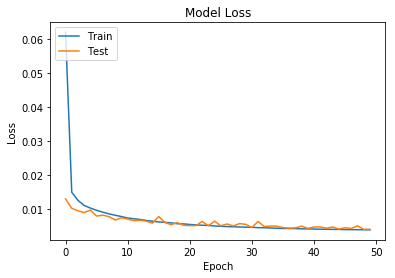

In [100]:
# plotting model loss

import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
plot_loss(Full_con_model) 

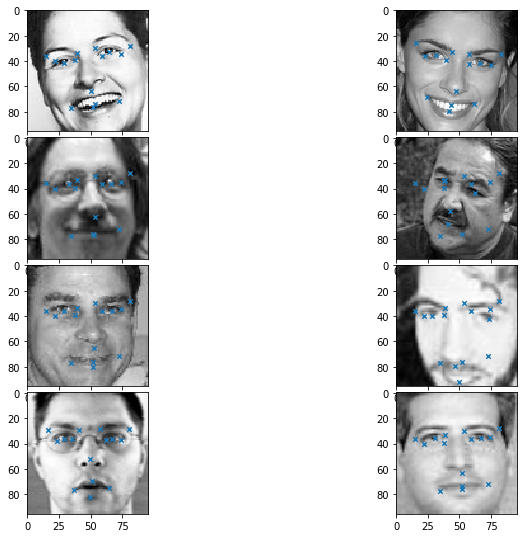

In [101]:
#Visualizing the images

def plot_sample_images(features,labels,axis):
  img=features.reshape(96,96)
  axis.imshow(img,cmap='gray')
  axis.scatter(labels[0::2]*48+48,labels[1::2]*48+48,marker='x',s=20)
  

  
fig=plt.figure(figsize=(10,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
  axis=fig.add_subplot(4,2,i+1)
  plot_sample_images(X[i],y[i],axis)
  
plt.show()

In [102]:
#Saving the model to use in future

from keras.models import load_model

model.save('FullyConnectedModel.h5')

model1=load_model('FullyConnectedModel.h5')

model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1950      
Total params: 1,189,982
Trainable params: 1,189,982
Non-trainable params: 0
_________________________________________________________________


## Convolution Neural Network

In [103]:
X=X.reshape(-1,96,96,1)
X.shape

(7049, 96, 96, 1)

In [104]:
y.shape

(7049, 30)

In [105]:
from keras.layers import MaxPooling2D, Conv2D , Flatten, Dropout
from keras.layers.normalization import BatchNormalization  

model2 = Sequential()

model2.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(96,96,1)))
model2.add(Dropout(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model2.add(BatchNormalization())

model2.add(Conv2D(32, 5, 5,activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

model2.add(Conv2D(64, 5, 5,activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model2.add(BatchNormalization())

model2.add(Conv2D(128, 3, 3,activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(500, activation="relu"))
model2.add(Dropout(0.1))

model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.1))

model2.add(Dense(30))


model2.summary()
model2.compile(optimizer='adam', 
  loss='mse',
  metrics=['mae','accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  
W0618 10:39:34.338690 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 10:39:34.419056 140244680959872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPool

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
Cnn_model_hist = model2.fit(X, y, nb_epoch=50,batch_size=128, validation_split=0.2,verbose=1)

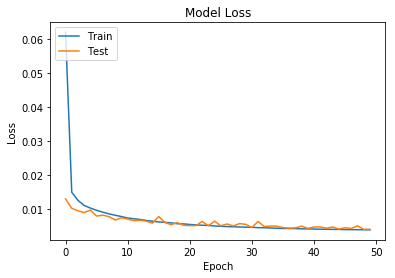

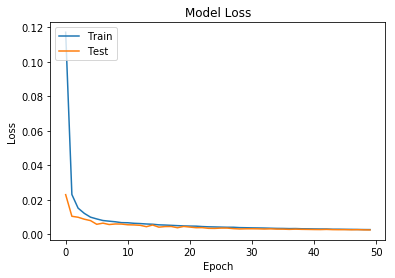

In [107]:
plot_loss(Full_con_model)
plot_loss(Cnn_model_hist)

## Comparision of Fully Connected model and CNN created above

In [0]:
# Predition of Fully Connected model

predict_full_conn= model1.predict(X_test)

In [0]:
#prediction by CNN
X_test_2d=X_test.reshape(-1,96,96,1)
predict_cnn=model2.predict(X_test_2d)

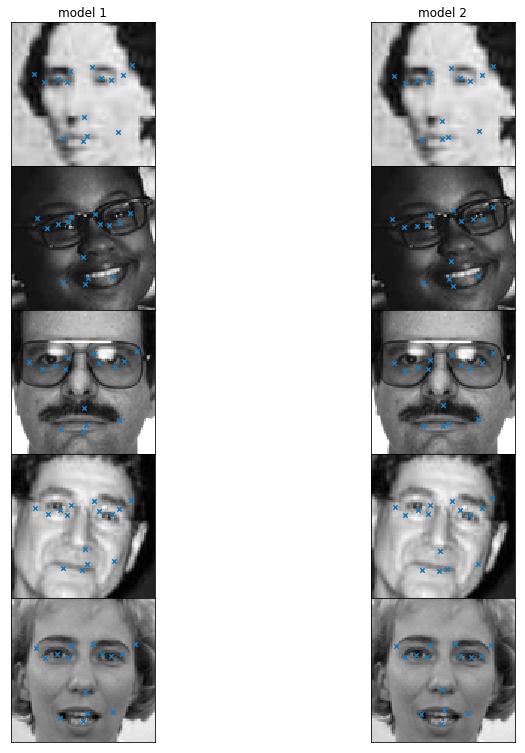

In [110]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X_test.shape[0])
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])        
    plot_sample_images(X_test[ipic],predict_full_conn[ipic],ax)
    if count < 3:
        ax.set_title("model 1")
        
    count += 1
    ax = fig.add_subplot(Npicture, 2, count,xticks=[],yticks=[])  
    plot_sample_images(X_test_2d[ipic],predict_cnn[ipic],ax)
    if count < 3:
        ax.set_title("model 2")
    count += 1
plt.show()

In [0]:
model2.save('cnn_model2.h5')

In [0]:
model2=load_model('cnn_model2.h5')

## Using Image Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size/2, replace=False)
        X_batch[indices] = X_batch[indices, :, :, ::-1]

        if y_batch is not None:
            
            y_batch[indices, ::2] = y_batch[indices, ::2] * -1

            # left_eye_center_x -> right_eye_center_x
            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )

        return X_batch, y_batch

In [0]:
from sklearn.model_selection import train_test_split

#we will use X, y dataset which was prepared during CNN 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Load the CNN model (or model 2) and feed the augmented data

model3= load_model('cnn_model2.h5')

flipped_generator=FlippedImageDataGenerator()


In [0]:
img_aug_model_hist=model3.fit_generator(flipped_generator.flow(X_train,y_train),samples_per_epoch=X_train.shape[0],
                              epochs=50,validation_data=(X_val,y_val))

In [0]:
#Saving the model for future use
model3.save('img_aug_model.h5')

## Comparison of last 3 models

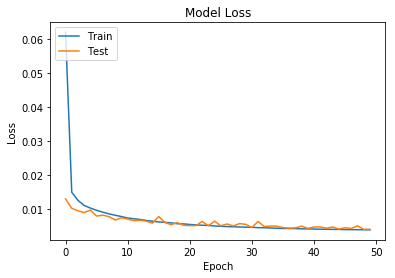

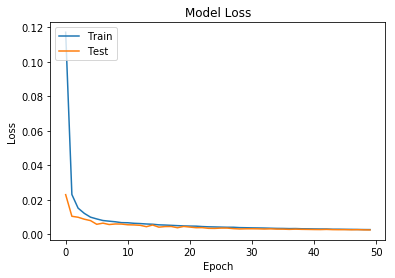

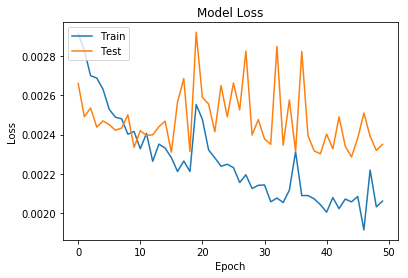

In [118]:
plot_loss(Full_con_model)

plot_loss(Cnn_model_hist)

plot_loss(img_aug_model_hist)

##Specialist Configuration

I have divided my dataset into 6 different groups.

I will train my model on each of these 6 groups separately.

All 6 models contains the same CNN architecture but the final output layer is adjusted for different number of outputs: for example we have a model for left eye and right eye center landmark prediction. As there are x and y coordinates for both eye centers, we have 4 nodes in the output layer of this model.

In [0]:
SPECIALIST_SETTINGS = [
    dict(
        columns=(
            'left_eye_center_x', 'left_eye_center_y',
            'right_eye_center_x', 'right_eye_center_y',
            ),
        flip_indices=((0, 2), (1, 3)),
        ),

    dict(
        columns=(
            'nose_tip_x', 'nose_tip_y',
            ),
        flip_indices=(),
        ),

    dict(
        columns=(
            'mouth_left_corner_x', 'mouth_left_corner_y',
            'mouth_right_corner_x', 'mouth_right_corner_y',
            'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
            ),
        flip_indices=((0, 2), (1, 3)),
        ),

    dict(
        columns=(
            'mouth_center_bottom_lip_x',
            'mouth_center_bottom_lip_y',
            ),
        flip_indices=(),
        ),

    dict(
        columns=(
            'left_eye_inner_corner_x', 'left_eye_inner_corner_y',
            'right_eye_inner_corner_x', 'right_eye_inner_corner_y',
            'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
            'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
            ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
        ),

    dict(
        columns=(
            'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y',
            'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y',
            'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
            'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
            ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
        ),
    ]

In [120]:
SPECIALIST_SETTINGS

[{'columns': ('left_eye_center_x',
   'left_eye_center_y',
   'right_eye_center_x',
   'right_eye_center_y'),
  'flip_indices': ((0, 2), (1, 3))},
 {'columns': ('nose_tip_x', 'nose_tip_y'), 'flip_indices': ()},
 {'columns': ('mouth_left_corner_x',
   'mouth_left_corner_y',
   'mouth_right_corner_x',
   'mouth_right_corner_y',
   'mouth_center_top_lip_x',
   'mouth_center_top_lip_y'),
  'flip_indices': ((0, 2), (1, 3))},
 {'columns': ('mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'),
  'flip_indices': ()},
 {'columns': ('left_eye_inner_corner_x',
   'left_eye_inner_corner_y',
   'right_eye_inner_corner_x',
   'right_eye_inner_corner_y',
   'left_eye_outer_corner_x',
   'left_eye_outer_corner_y',
   'right_eye_outer_corner_x',
   'right_eye_outer_corner_y'),
  'flip_indices': ((0, 2), (1, 3), (4, 6), (5, 7))},
 {'columns': ('left_eyebrow_inner_end_x',
   'left_eyebrow_inner_end_y',
   'right_eyebrow_inner_end_x',
   'right_eyebrow_inner_end_y',
   'left_eyebrow_outer_end_x',
   

Reloading the data as I changed the original data in previous models

In [0]:
#Defining this method to load specific columns as per settings

def load2d(test=False,cols=None):

    if test:
      X=prepare_train_test_feature(test_ds)
      X=X.reshape(-1,96,96,1)
      y=None
      
    else:
      X=prepare_train_test_feature(train_ds)   
      X=X.reshape(-1,96,96,1)
      
      y=prepare_train_labels(train_ds, cols)
    
    return X, y

In [0]:
from collections import OrderedDict

def fit_specialists(freeze=True,
                    print_every=10,
                    epochs=100,
                    prop=0.1,
                    name_transfer_model="img_aug_model.h5"):
    specialists = OrderedDict()
 

    for setting in SPECIALIST_SETTINGS:
        
        cols = setting['columns']
        flip_indices = setting['flip_indices']
        
        X,y=load2d(cols=list(cols))
        X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                          test_size=0.2, 
                                                          random_state=42)
        model4 = load_model(name_transfer_model) 
        if freeze:
            for layer in model.layers:
                layer.trainable = False
            
        model4.layers.pop() # get rid of output layer
        model4.outputs = [model4.layers[-1].output]
        model4.layers[-1].outbound_nodes = []
        model4.add(Dense(len(cols))) # add new output layer

        model4.compile(loss='mean_squared_error', optimizer="adam")
        
        flipgen = FlippedImageDataGenerator()
        flipgen.flip_indices = setting['flip_indices']
        print(X_train.shape)
        print(y_train.shape)
        print(X_val.shape)
        print(y_val.shape)
        hist_final = model4.fit_generator(flipgen.flow(X_train, y_train),
                                     samples_per_epoch=X_train.shape[0],
                                     nb_epoch=epochs,
                                     validation_data=(X_val, y_val))
        
        ## print(model.summary()) 
        
       
        specialists[cols] = model4
    return(specialists)

In [0]:
specialists1 = fit_specialists(freeze=True,
                    print_every=10,
                    epochs=30,
                    name_transfer_model="img_aug_model.h5")

In [0]:
specialists1

# Model Evaluation

In [0]:
from pandas import DataFrame, concat

X_test,_ = load2d(test=True)

## prediction with model 3
y_pred3 = model3.predict(X_test)

In [0]:
landmark_name = train_ds.columns[0:-1].values #exclude the last column 'Image'

df_y_pred3 = DataFrame(y_pred3,columns = landmark_name)

In [156]:
df_y_pred3.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,0.371698,-0.192193,-0.374517,-0.219568,0.236449,-0.246800,0.548151,-0.274771,-0.218368,-0.180774,-0.541945,-0.163980,0.114063,-0.374164,0.691822,-0.413349,-0.194042,-0.308458,-0.691383,-0.261710,-0.047693,0.356147,0.504646,0.500988,-0.292640,0.603539,0.067527,0.583098,-0.045457,0.613581
1,0.389871,-0.203500,-0.358747,-0.215717,0.238910,-0.247193,0.549434,-0.276070,-0.217047,-0.180480,-0.540698,-0.162447,0.118708,-0.374895,0.691224,-0.415455,-0.190837,-0.309356,-0.690864,-0.259078,-0.003452,0.345884,0.506271,0.499585,-0.288629,0.604610,0.073855,0.581904,-0.002866,0.607865
2,0.368685,-0.247716,-0.338294,-0.151205,0.221604,-0.243068,0.521705,-0.278547,-0.220168,-0.168694,-0.535468,-0.143339,0.110211,-0.368516,0.643180,-0.423284,-0.198356,-0.299537,-0.677759,-0.239658,0.111567,0.305778,0.491196,0.490546,-0.264572,0.608738,0.086774,0.570127,0.136253,0.580942


In [0]:
## prediction with specialist model
def predict_specialist(specialists1,X_test):
    y_pred_s = []
    for columns, value in specialists1.items():
        smodel = value

        y_pred = smodel.predict(X_test)
        y_pred = DataFrame(y_pred,columns=columns)
        y_pred_s.append(y_pred)

    df_y_pred_s = concat(y_pred_s,axis=1)
    return(df_y_pred_s)

In [0]:
df_y_pred_s = predict_specialist(specialists1,X_test)
y_pred_s = df_y_pred_s.values

In [160]:
df_y_pred_s.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,left_eye_inner_corner_x,left_eye_inner_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y
0,0.384589,-0.229659,-0.387558,-0.271167,-0.044810,0.346799,0.509602,0.498133,-0.283211,0.609293,0.078759,0.581838,-0.057771,0.605004,0.23464,-0.248895,-0.221609,-0.18014,0.538437,-0.285153,-0.534104,-0.156053,0.104853,-0.3689,-0.187434,-0.303167,0.683993,-0.418638,-0.698309,-0.250551
1,0.361474,-0.199547,-0.309370,-0.188982,0.017530,0.323273,0.509602,0.498133,-0.283211,0.609293,0.078759,0.581838,0.029854,0.601287,0.23464,-0.248895,-0.221609,-0.18014,0.538437,-0.285153,-0.534104,-0.156053,0.104853,-0.3689,-0.187434,-0.303167,0.683993,-0.418638,-0.698309,-0.250551
2,0.331599,-0.303396,-0.324283,-0.149486,0.094464,0.293949,0.509602,0.498133,-0.283211,0.609293,0.078759,0.581838,0.206625,0.492933,0.23464,-0.248895,-0.221609,-0.18014,0.538437,-0.285153,-0.534104,-0.156053,0.104853,-0.3689,-0.187434,-0.303167,0.683993,-0.418638,-0.698309,-0.250551


In [0]:
#Compare the difference betwen 3rd model(Image augmentation and Special setting model)

df_y_pred_s = df_y_pred_s[df_y_pred3.columns]
df_compare = {}
df_compare["difference"] = ((df_y_pred_s - df_y_pred3)**2).mean(axis=1)
df_compare["RowId"] = range(df_y_pred_s.shape[0])
df_compare = DataFrame(df_compare)
df_compare = df_compare.sort_values("difference",ascending=False)

In [163]:
df_compare.head(10)

,difference,RowId
1149,0.008727,1149
913,0.007888,913
1559,0.005510,1559
719,0.004277,719
128,0.004105,128
724,0.003992,724
444,0.003972,444
132,0.003959,132
309,0.003766,309
1269,0.003745,1269


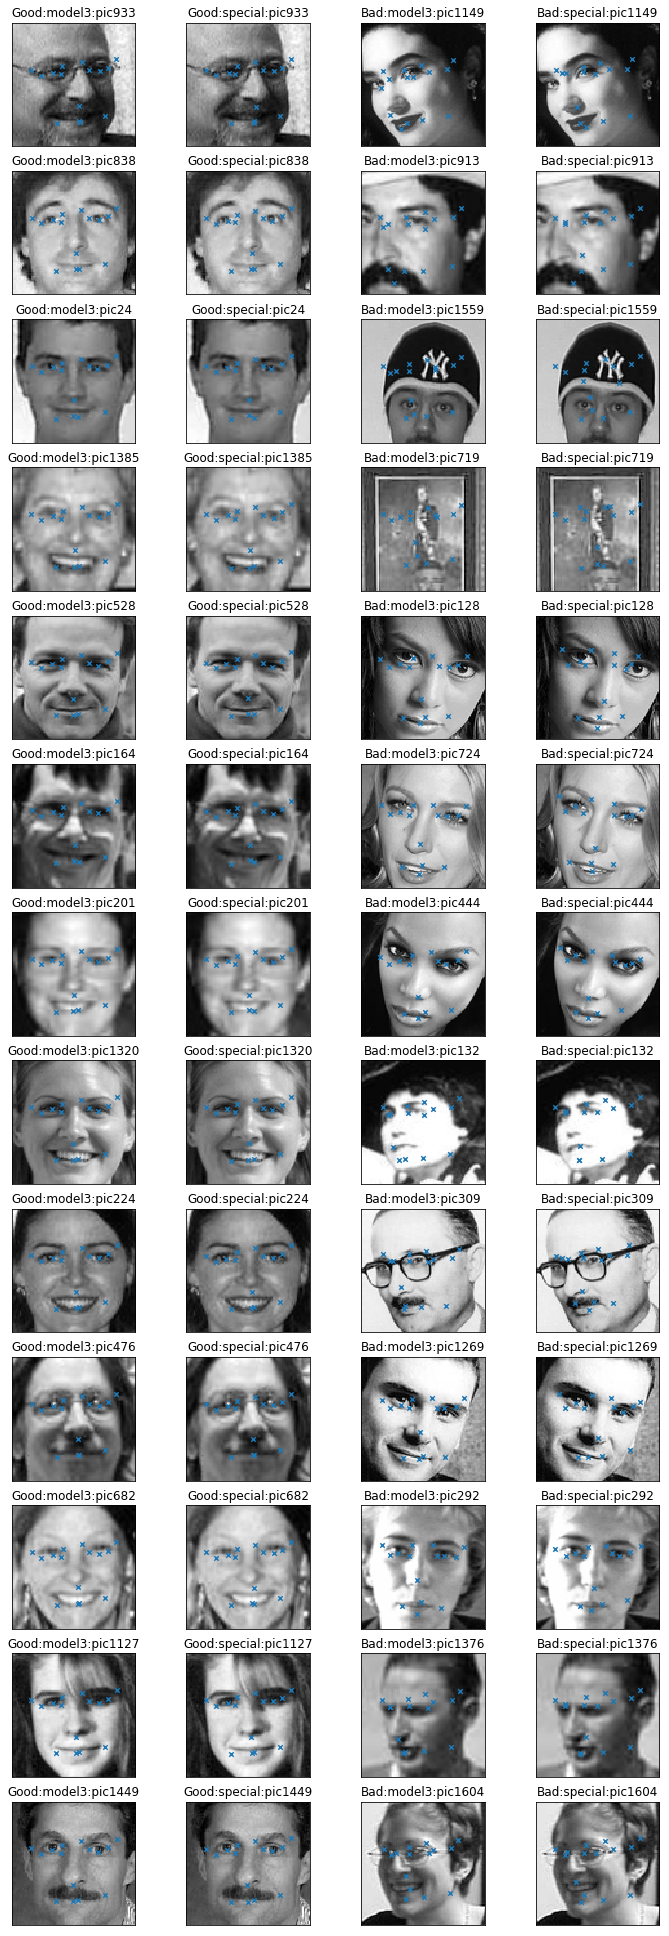

In [166]:
fig = plt.figure(figsize=(12,35))

Nsample = 13
pic_index = df_compare["RowId"].iloc[:Nsample].values
pic_index_good = df_compare["RowId"].iloc[-Nsample:].values
count = 1


for ipic_g,ipic in zip(pic_index_good,pic_index):
    ## good model 3
    ax = fig.add_subplot(Nsample,4,count,xticks=[],yticks=[])
    count += 1
    plot_sample_images(X_test[ipic_g],y_pred3[ipic_g],ax)
    ax.set_title("Good:model3:pic"+str(ipic_g))
    
    ## good special
    ax = fig.add_subplot(Nsample,4,count,xticks=[],yticks=[])
    count += 1
    plot_sample_images(X_test[ipic_g],y_pred_s[ipic_g],ax)
    ax.set_title("Good:special:pic"+str(ipic_g))
    
    ## bad model 3
    ax = fig.add_subplot(Nsample,4,count,xticks=[],yticks=[])
    count += 1
    plot_sample_images(X_test[ipic],y_pred3[ipic],ax)
    ax.set_title("Bad:model3:pic"+str(ipic))
    
    ## bad special
    ax = fig.add_subplot(Nsample,4,count,xticks=[],yticks=[])
    count += 1
    plot_sample_images(X_test[ipic],y_pred_s[ipic],ax)
    ax.set_title("Bad:special:pic"+str(ipic))

plt.show()

In [167]:
IdLookup = lookup_dir_ds

def prepare_submission(y_pred4,filename):
    '''
    save a .csv file that can be submitted to kaggle
    '''
    ImageId = IdLookup["ImageId"]
    FeatureName = IdLookup["FeatureName"]
    RowId = IdLookup["RowId"]
    
    submit = []
    for rowId,irow,landmark in zip(RowId,ImageId,FeatureName):
        submit.append([rowId,y_pred4[landmark].iloc[irow-1]])
    
    submit = DataFrame(submit,columns=["RowId","Location"])
  
       ## adjust the scale 
    submit["Location"] = submit["Location"]*48 + 48
    print(submit.shape)

      #loc = "result/" + filename + ".csv"
    
  if filename == "model3":
       submit.to_csv("model3.csv",index=False) 
    else:
        submit.to_csv("special.csv",index=False)
    
#     print("File is saved at:" +  loc)

prepare_submission(df_y_pred_s,"special")    
prepare_submission(df_y_pred3,"model3")

(27124, 2)
(27124, 2)
